<a href="https://colab.research.google.com/github/sky16k/fps-3/blob/main/%D0%BE%D1%81%D0%BD%D0%BE%D0%B2%D1%8B_%D1%81%D1%82%D0%B0%D1%82_2_testing_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

С помощью статистических критериев сравнить динамику заболеваемости
Гипотеза: “Динамика заболеваемости в России отличается от динамики заболеваемости в Соединённых штатах”
1. найти статистические критерии для динамических рядов
2. вычислить эти критерии
3. сравнить (равны/не равны)
4. сделать выводы и отчёт

1 . ряды 'confirmed' и 'deaths' в отдельных таблицах по странам :
  - моментные, 
  - равномерные, 
  - изолированные, 
  - абсолютных величин.

n - кол-во измерений (каждый день по измерению)
n = len(df1) 

t - длительность опыта (дней) 
t = n-1

  показатели изменения уровней :
  - абсолютное изменение (абсолютный прирост): dy[i] = y[i] - y[i-1]
  - коэффициент роста (индекс динамики): Ky[i]=y[i]/y[i-1]
  - темп прироста: Ty[i] = Ky[i]*100 - 100%

  Средние показатели динамических рядов: 
  - средний хронологический уровень: y_mean = (sum(y)-0.5y[1]-0.5y[n])/t
  - средний абсолютный прирост: dy_mean = sum(dy)/t
  - средний коэффициент роста: Ky_mean = (y[n]/y[1])**(1/t)
  - средний темп прироста: Ty_mean = Ky_mean*100-100%

Подключение библиотек

In [1]:
import copy
import pandas as pd
import seaborn as sns   #работа с красивыми графиками
import matplotlib.pyplot as plt   #работа с графиками

Загрузка и просмотр данных

In [2]:
df = pd.read_excel('FPS_hw_2_df_2_COVID-19.xlsx')#,index_col='date')
df#.head()
#len(df)

,date,country,confirmed,deaths
0,2020-01-22,Russia,0,0
1,2020-01-22,US,1,0
2,2020-01-23,Russia,0,0
3,2020-01-23,US,1,0
4,2020-01-24,Russia,0,0
...,...,...,...,...
1111,2021-07-30,US,34945468,613013
1112,2021-07-31,Russia,6185249,155952
1113,2021-07-31,US,34978276,613157
1114,2021-08-01,Russia,6207513,156726


Формирование выборок по странам

In [3]:
### Формирование выборок
df1_label = 'Russia'
df2_label = 'US'

df1 = copy.deepcopy(df[df['country'] == df1_label].reset_index(drop=True))
df2 = copy.deepcopy(df[df['country'] == df2_label].reset_index(drop=True))

print('количество наблюдений',df1_label,':', len(df1) )
print('количество наблюдений',df2_label,':', len(df2) )
print('Выборки имеют одинаковую длину: ', len(df1) == len(df2))

t = len(df1)-1

print('Длительность опыта составила',t,'дней')

количество наблюдений Russia : 558
количество наблюдений US : 558
Выборки имеют одинаковую длину:  True
Длительность опыта составила 557 дней


In [4]:
#df1['ind'] = range(1, len(df1)+1)
#df1.reindex(list(range(1,len(df1)+1)))
df1, df2

(          date country  confirmed  deaths
 0   2020-01-22  Russia          0       0
 1   2020-01-23  Russia          0       0
 2   2020-01-24  Russia          0       0
 3   2020-01-25  Russia          0       0
 4   2020-01-26  Russia          0       0
 ..         ...     ...        ...     ...
 553 2021-07-28  Russia    6116249  153620
 554 2021-07-29  Russia    6138969  154404
 555 2021-07-30  Russia    6161985  155180
 556 2021-07-31  Russia    6185249  155952
 557 2021-08-01  Russia    6207513  156726
 
 [558 rows x 4 columns],           date country  confirmed  deaths
 0   2020-01-22      US          1       0
 1   2020-01-23      US          1       0
 2   2020-01-24      US          2       0
 3   2020-01-25      US          2       0
 4   2020-01-26      US          5       0
 ..         ...     ...        ...     ...
 553 2021-07-28      US   34672690  611803
 554 2021-07-29      US   34750860  612124
 555 2021-07-30      US   34945468  613013
 556 2021-07-31      US   34

In [5]:
#найти индекс первого значимого элемента
def index_1st (val):
    for i in list(range(len(val))):
        if val[i] != 0:
           return i 

#df1['confirmed']

In [6]:
df1_conf_1st = index_1st(df1['confirmed'])
df1_death_1st= index_1st(df1['deaths'])
df1_conf_1st, df1_death_1st

(9, 57)

In [7]:
df2_conf_1st = index_1st(df2['confirmed'])
df2_death_1st= index_1st(df2['deaths'])
df2_conf_1st, df2_death_1st

(0, 38)

In [8]:
df1['dconf']=df1['confirmed']-df1['confirmed'].shift(1)
df1['ddeath']=df1['deaths']-df1['deaths'].shift(1)
df1['leth'] = df1['ddeath']/df1['dconf']
df1

,date,country,confirmed,deaths,dconf,ddeath,leth
0,2020-01-22,Russia,0,0,NaN,NaN,NaN
1,2020-01-23,Russia,0,0,0.0,0.0,NaN
2,2020-01-24,Russia,0,0,0.0,0.0,NaN
3,2020-01-25,Russia,0,0,0.0,0.0,NaN
4,2020-01-26,Russia,0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
553,2021-07-28,Russia,6116249,153620,21870.0,784.0,0.035848
554,2021-07-29,Russia,6138969,154404,22720.0,784.0,0.034507
555,2021-07-30,Russia,6161985,155180,23016.0,776.0,0.033716
556,2021-07-31,Russia,6185249,155952,23264.0,772.0,0.033184


In [9]:
df2['dconf']=df2['confirmed']-df2['confirmed'].shift(1)
df2['ddeath']=df2['deaths']-df2['deaths'].shift(1)
df2['leth'] = df2['ddeath']/df2['dconf']
df2

,date,country,confirmed,deaths,dconf,ddeath,leth
0,2020-01-22,US,1,0,NaN,NaN,NaN
1,2020-01-23,US,1,0,0.0,0.0,NaN
2,2020-01-24,US,2,0,1.0,0.0,0.000000
3,2020-01-25,US,2,0,0.0,0.0,NaN
4,2020-01-26,US,5,0,3.0,0.0,0.000000
...,...,...,...,...,...,...,...
553,2021-07-28,US,34672690,611803,68771.0,387.0,0.005627
554,2021-07-29,US,34750860,612124,78170.0,321.0,0.004106
555,2021-07-30,US,34945468,613013,194608.0,889.0,0.004568
556,2021-07-31,US,34978276,613157,32808.0,144.0,0.004389


Визуализация

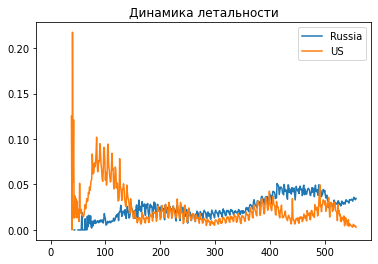

In [10]:
#sns.distplot(df1['Height'],50)
#sns.distplot(df2['Height'],50)
df1['leth'].plot(label=df1_label)
df2['leth'].plot(label=df2_label)
plt.title('Динамика летальности')
plt.legend() #['Male', 'Female']
plt.show()

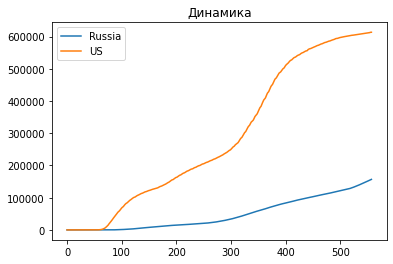

In [11]:
df1['deaths'].plot(label=df1_label)
df2['deaths'].plot(label=df2_label)
plt.title('Динамика')
plt.legend()  #['Male', 'Female']
plt.show()

In [12]:
df1['kconf'] = df1['confirmed']/df1['confirmed'].shift(1)
df1['kdeath']= df1['deaths']/ df1['deaths'].shift(1)
df1['tconf'] = df1['kconf'] *100 - 100
df1['tdeath']= df1['kdeath']*100 - 100
df1

,date,country,confirmed,deaths,dconf,ddeath,leth,kconf,kdeath,tconf,tdeath
0,2020-01-22,Russia,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,Russia,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,Russia,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,Russia,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,Russia,0,0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
553,2021-07-28,Russia,6116249,153620,21870.0,784.0,0.035848,1.003589,1.005130,0.358855,0.512968
554,2021-07-29,Russia,6138969,154404,22720.0,784.0,0.034507,1.003715,1.005104,0.371470,0.510350
555,2021-07-30,Russia,6161985,155180,23016.0,776.0,0.033716,1.003749,1.005026,0.374916,0.502578
556,2021-07-31,Russia,6185249,155952,23264.0,772.0,0.033184,1.003775,1.004975,0.377541,0.497487


In [13]:
df2['kconf'] = df2['confirmed']/df2['confirmed'].shift(1)
df2['kdeath']= df2['deaths'] / df2['deaths'].shift(1)
df2['tconf'] = df2['kconf'] *100 - 100
df2['tdeath']= df2['kdeath']*100 - 100
df2

,date,country,confirmed,deaths,dconf,ddeath,leth,kconf,kdeath,tconf,tdeath
0,2020-01-22,US,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,US,1,0,0.0,0.0,NaN,1.000000,NaN,0.000000,NaN
2,2020-01-24,US,2,0,1.0,0.0,0.000000,2.000000,NaN,100.000000,NaN
3,2020-01-25,US,2,0,0.0,0.0,NaN,1.000000,NaN,0.000000,NaN
4,2020-01-26,US,5,0,3.0,0.0,0.000000,2.500000,NaN,150.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
553,2021-07-28,US,34672690,611803,68771.0,387.0,0.005627,1.001987,1.000633,0.198738,0.063296
554,2021-07-29,US,34750860,612124,78170.0,321.0,0.004106,1.002255,1.000525,0.225451,0.052468
555,2021-07-30,US,34945468,613013,194608.0,889.0,0.004568,1.005600,1.001452,0.560009,0.145232
556,2021-07-31,US,34978276,613157,32808.0,144.0,0.004389,1.000939,1.000235,0.093883,0.023491


In [14]:
df1_conf_mean = (df1['confirmed'].sum() -0.5*df1['confirmed'].loc[0] -0.5*df1['confirmed'].loc[t])/t
df1_death_mean = (df1['deaths'].sum() -0.5*df1['deaths'].loc[0] -0.5*df1['deaths'].loc[t])/t
df1_dconf_mean = df1['dconf'].sum()/t
df1_ddeath_mean = df1['ddeath'].sum()/t
df1_kconf_mean = (df1['confirmed'].loc[t]/df1['confirmed'].loc[df1_conf_1st])**(1/(t-df1_conf_1st))
df1_kdeath_mean = (df1['deaths'].loc[t]/df1['deaths'].loc[df1_death_1st])**(1/(t-df1_death_1st))
df1_tconf_mean = df1_kconf_mean*100 - 100
df1_tdeath_mean = df1_kdeath_mean*100 - 100

df1_conf_mean, df1_death_mean, df1_dconf_mean, df1_ddeath_mean, df1_kconf_mean, df1_kdeath_mean, df1_tconf_mean, df1_tdeath_mean

(2299002.5951526035,
 48351.19928186714,
 11144.547576301617,
 281.375224416517,
 1.0276530376106119,
 1.0242129957743624,
 2.7653037610611904,
 2.421299577436244)

In [15]:
df2_conf_mean = (df2['confirmed'].sum() -0.5*df2['confirmed'].loc[0] -0.5*df2['confirmed'].loc[t])/t
df2_death_mean = (df2['deaths'].sum() -0.5*df2['deaths'].loc[0] -0.5*df2['deaths'].loc[t])/t
df2_dconf_mean = df2['dconf'].sum()/t
df2_ddeath_mean = df2['ddeath'].sum()/t
df2_kconf_mean = (df2['confirmed'].loc[t]/df2['confirmed'].loc[df2_conf_1st])**(1/(t-df2_conf_1st))
df2_kdeath_mean = (df2['deaths'].loc[t]/df2['deaths'].loc[df2_death_1st])**(1/(t-df2_death_1st))
df2_tconf_mean = df2_kconf_mean*100 - 100
df2_tdeath_mean = df2_kdeath_mean*100 - 100

df2_conf_mean, df2_death_mean, df2_dconf_mean, df2_ddeath_mean, df2_kconf_mean, df2_kdeath_mean, df2_tconf_mean, df2_tdeath_mean

(14712339.39497307,
 290654.34111310594,
 62842.75763016158,
 1100.947935368043,
 1.0316780341648206,
 1.026009749071681,
 3.1678034164820588,
 2.6009749071681085)

In [16]:
df2_conf_mean = (df2['confirmed'].sum() -0.5*df2['confirmed'].loc[0] -0.5*df2['confirmed'].loc[len(df2)-1])/t
df2_death_mean = (df2['deaths'].sum() -0.5*df2['deaths'].loc[0] -0.5*df2['deaths'].loc[len(df2)-1])/t
df2_conf_mean, df2_death_mean

(14712339.39497307, 290654.34111310594)